In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 68% 45.0M/66.0M [00:00<00:00, 195MB/s]
100% 66.0M/66.0M [00:00<00:00, 219MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.utils import shuffle
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,precision_score,recall_score,matthews_corrcoef,make_scorer,roc_auc_score,roc_curve
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler,BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler,TomekLinks,NearMiss
from imblearn.combine import SMOTETomek
from matplotlib import gridspec
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def PCA_ALGO(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    X=shuffle(NEW_X)
    y=X.iloc[:,-1].values

    pca = PCA(n_components=2)
    pca_data=pca.fit_transform(X)
    print(pca_data.shape)
    pca_data=np.vstack((pca_data.T,y)).T
    print(pca_data.shape)
    print(pca_data)
    pca_df=pd.DataFrame(data=pca_data,columns=('PCA1','PCA2','Classe'))
    sns.FacetGrid(pca_df,hue='Classe',size=6).map(plt.scatter,'PCA1','PCA2').add_legend()
    plt.show()

def Distribution(X,y):
    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    #SNS COUNTPLOT
    fig,ax=plt.subplots(figsize=(5,5))
    sns.countplot(data=NEW_X,x="Class")
    plt.show()
def TSNE_algo(X,y):

    #PREPARATION DES DONNEES
    tsne = TSNE(n_components=2,learning_rate=100,perplexity=50.0,early_exaggeration=20.0,init='pca')
    NEW_X=pd.DataFrame(data=X,columns=colonnes_X)
    NEW_X['Class']=pd.DataFrame(data=y,columns=colonnes_Y)
    Fraude=NEW_X[NEW_X['Class']==1]
    Normal=NEW_X[NEW_X['Class']==0]
    Normal=Normal.iloc[0:10000] #pour prendre que 10000 transaction normale
    X=pd.concat([Normal,Fraude])
    X=shuffle(X)
    y=X.iloc[:,-1].values

    #TSNE
    x_test_2d = tsne.fit_transform(X)
    color_map = {0:'green', 1:'red'}
    plt.figure()
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x_test_2d[y==cl,0], 
                    y = x_test_2d[y==cl,1], 
                    c = color_map[idx], 
                    label = cl)
    plt.xlabel('Composant t-SNE 1')
    plt.ylabel('Composant t-SNE 2')
    plt.legend(loc='upper left')
    plt.title('Représentation des données avec T-SNE')
    plt.show()

In [ ]:
def roc_auc_plot(y_test,y_pred):

    plt.figure(figsize=(8,6))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print("AUC - ",auc,"\n")

    plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
    plt.legend(loc=4)

    plt.plot([0,1], [0,1], 'k--' )

    plt.rcParams['font.size'] = 12
    plt.title('Courbe ROC')
    plt.xlabel('taux de faux positifs')
    plt.ylabel('taux de vrai positifs')

    plt.show()

In [ ]:
def eps(X):
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
def dbscan_classification(X_ts,y_ts,e,ms):
    dbscan=DBSCAN(eps=e,min_samples=ms).fit(X_ts)
    labels = dbscan.labels_
    print("le nombre de clusters trouvés = {}".format(len(set(labels))))
    cluster, count = np.unique(labels, return_counts=True)
    print("le nombre d'instances dans chaque cluster = \n {} \n".format(dict(zip(cluster, count))))
    #classifcation
    y_pred=[]
    for lab in labels :
        if lab == -1 :
            y_pred.append(1)
        else:
            y_pred.append(0)
    print("transactions de la dataset originale ={}".format(Counter(y_ts)))
    print("résultat de transactions prédits ={}".format(Counter(y_pred)))
    #performance
    print('Accuracy :{0:0.5f}'.format(accuracy_score(y_pred, y_ts))) 
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 22}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 15)
    plt.xlabel('Prédit',fontsize = 15)
    plt.ylabel('Réel',fontsize = 15)
    plt.show()
    roc_auc_plot(y_ts,y_pred)

In [ ]:
df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [ ]:
# print("Meilleur EPS")
# eps(X_test)

DBSCAN EPS=3 ,Min_samples=10
le nombre de clusters trouvés = 33
le nombre d'instances dans chaque cluster = 
 {-1: 17125, 0: 232187, 1: 14481, 2: 352, 3: 1722, 4: 8, 5: 16768, 6: 1073, 7: 8, 8: 220, 9: 83, 10: 10, 11: 8, 12: 81, 13: 18, 14: 16, 15: 37, 16: 8, 17: 25, 18: 349, 19: 17, 20: 21, 21: 13, 22: 20, 23: 19, 24: 15, 25: 20, 26: 11, 27: 14, 28: 9, 29: 17, 30: 16, 31: 36} 

transactions de la dataset originale =Counter({0.0: 284315, 1.0: 492})
résultat de transactions prédits =Counter({0: 267682, 1: 17125})
Accuracy :0.94116
Precision : 0.02505
Recall : 0.87195
F1 : 0.04870
roc_auc_score_score : 0.90661
\\Matrice de confusion ///:- 
 [[267619  16696]
 [    63    429]]


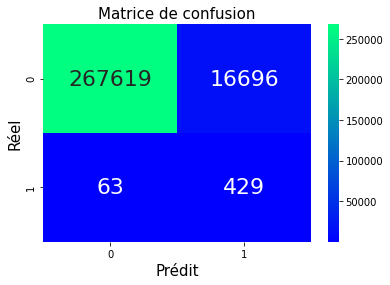

AUC -  0.9066138103434742 



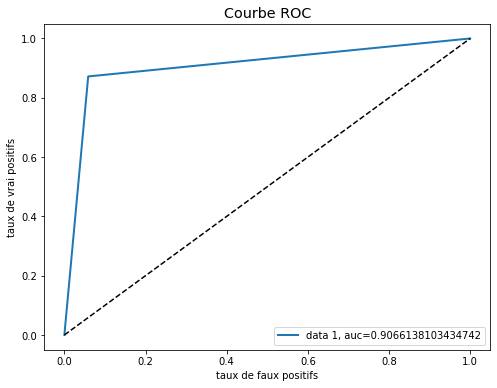

In [ ]:
print("DBSCAN EPS=3 ,Min_samples=10")
dbscan_classification(x,y,3,10)
